#Assignment 2:
    test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 
    
    1) KS
    
    2) KL or Chisq
    
    3) AD
    
    6 test total (8 if you are ambitious and want to try Pearson's chisq)
    
    i want you to use the scipy.stats package for this. it will provide tests. For KS and AD you will simply need to generate the distribution the normal will be tested agains: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL and chisq do not. I am showing you how to do the AD, KS and KL for binomial, you can replicate it for the poisson or do the Chisq instead of KL.
    
    even if you just replicate it... PLEASE UNDESRTAND IT! or you will have learned nothing and wasted both of our times

my usual imports and setups

In [1]:
import pylab as pl
import numpy as np
import scipy.stats
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Here are the manual pages for the tests:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

i need to figure out what each test function returns. let me run them once to see (and read the manual atthe same time!)

i am testing for normal against normal and for a binomial w small n*p against normal. that will give me very different outcomes.


###KS and Anderson tests for testing Normal on Normal and *Binomial* on Normal

In [2]:
#for reproducibility/ generating distributions
np.random.seed(1)
dist_n = np.random.randn(1000)

#testing ad and ks. for normal/ normal
print "normal on normal KS test result", scipy.stats.kstest(dist_n,'norm')
print "normal on normal A-D result", scipy.stats.anderson(dist_n, dist='norm')
print "" 

p = .77
dist_b = np.random.binomial(1, p, 1000)

print "binomial on normal KS test result", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal A-D result", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

##what is this threshold I am saving??

##### ANSWER #####
#The threshold being saved is the critical value associated w/ a 1% confidence level for testing 
#against a guassian reference distribution. 


normal on normal KS test result (0.034903542365887219, 0.17088563112849142)
normal on normal A-D result (0.37034000708831627, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

binomial on normal KS test result (0.60734474606854294, 0.0)
binomial on normal A-D result (247.81875634146172, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


I will leave it to you to study the outputs in detail, but lets use the statistics. 

The statistics value will be **larger** if the distributions are **not** likely to be related. 
think about this in terms of rejection of the NULL hypothesis. 

##try writing down the null for each test and see if scipy manual agrees with you  (the manual spells out the Null)

###For normal on normal:
* KS Test null hypothesis: the sample is drawn from whatever reference distribution it is being tested against. In this case, test statistic is low, indicating distributions are very similar, but p-value is large. With an alpha of .05, the null can't be rejected. 

* Anderson-Darling null hypothesis : same as for KS. Test statistic of .37 is below significance level of .784 (corresponds with alpha .05) means that null cannot be rejected. 

###For binomial on normal:
* KS Test null hypothesis: the sample is drawn from whatever reference distribution it is being tested against. In this case, test statistic is relatively high (.61), indicating distributions are different with p-value of 0. With an alpha of .05, the null can easily be rejected. Distributions are different.

* Anderson-Darling null hypothesis : same as for KS. Test statistic of 247.8 is way above significance level of .784 (corresponds with alpha .05) means that null can be rejected. Distributions are different.


the KL divergence is a little trickier: i have to pass it the values of the distribution at some x's: that means i have to pass it a **NORMALIZED HOSTOGRAM OF MY DISTRIBUTION**, i.e. derive a PDF from the data. we have done it before!

i have to pass it a function for my comparison distribution evaluated at the x-values where my empirical distribution is evaluated.  not just the name of a distribution

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
#notice the extra comma on the left side of the '=' sign: 
#that tells numpy to take the first two values returned and throws away the rest

then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

In [4]:
#For normal and binomial (not Poisson) on normal
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

#you can interpret this as a distance: it increases as the distributions diverge

normal on normal 0.00643606379898
binomial on normal 1.94884219668


**Entropy (a.k.a. Kullback-Leibler test) null hypothesis: Entropy (information loss) between sample and reference is insignificant. Null holds for normal on normal (low test statistic of .006), but is rejected for binomial on normal (high test statistic of 1.94).**

###Low value for normal on normal means that the NULL hypothesis cannot be rejected. It cannot be said that the distributions are not identical.
###High value for binomial on normal indicates that the NULL hypothesis can be rejected. There is a statistiscally significant amount of discord between binomial and normal. Distributions are not the same.

#BINOMIAL

In [5]:
#to store the data i am generating an empty array of the size of the values of n i want to test. 
#i do that with np.zeros which takes the length of the array as argument, 
#and the data type as optional argument, but default is float, which is fine by me, 
#so i do not need any argument other then the lenghth

narray = range(1,150,1) #increased from 50 to 150
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match
#n = 50
#p = 0.6 #increased from 0.5
for i, n in enumerate(narray):
    #p = 0.3 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    
    #run the tests for KS and A-D
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, (n*p*(1.0-p))**.5))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
  
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    chi2_b[i] = scipy.stats.chi2.pdf(dist,df=(n-1),loc=n*p,scale=n*p*(1.0-p))[0]

#this is just one way to plot it. get creative and find the best way to show your result!
then give me a cell in which you write a caption for the figures you plot. think about how the captions are written in the paper  you have to read for this week assignment: a caption must describe the plot sufficiently well that i do not need to read the paper to understand it. though it will generally lack details of the how and why you see what you see. those are in the paper

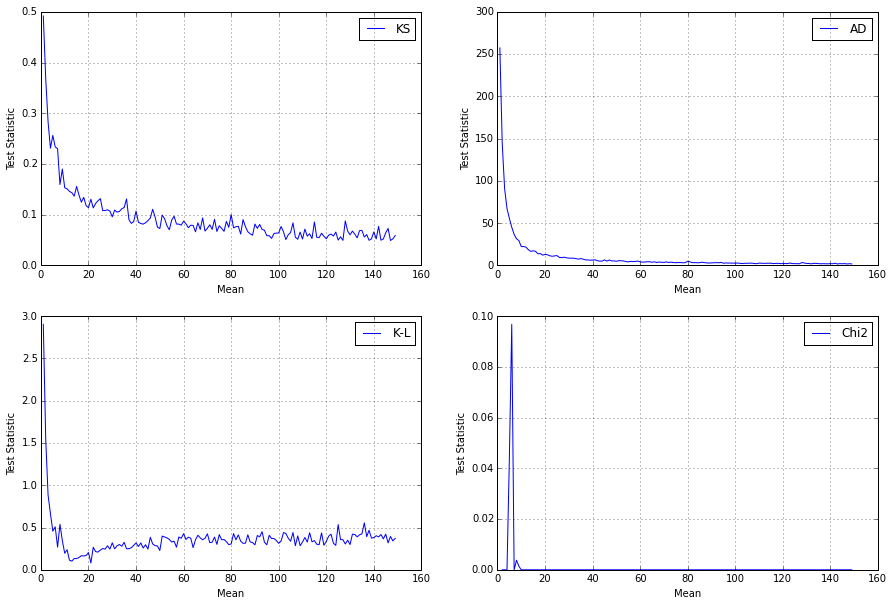

In [6]:
#For binomial vs normal
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_b, label='KS')
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L ')
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

fig.add_subplot(224)
pl.plot(narray, chi2_b, label="Chi2")
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

*Fig 1.* The four charts above, clockwise from top left, display the results of the KS, A-D, Chi2 and K-L tests run on a binomial vs normal distribution. They demonstrate that as sample mean increases, the test statistic generally decreases, suggesting a clustering closer to the mean. 

#POISSON

In [14]:
#to store the data i am generating an empty array of the size of the values of n i want to test. 
#i do that with np.zeros which takes the length of the array as argument, 
#and the data type as optional argument, but default is float, which is fine by me, 
#so i do not need any argument other then the length

narray1 = range(1,200,1)
ks_p = np.zeros(len(narray1))
ad_p = np.zeros(len(narray1))
kl_p = np.zeros(len(narray1))
chi2_p = np.zeros(len(narray1))


#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i, n in enumerate(narray1):
    #generate the distribution
    dist1 = np.random.poisson(n, 1000)
    #run the tests. 
    ks_p[i] = scipy.stats.kstest(dist1, mynorm, args=(n, n))[0]
    #ks_p[i] = scipy.stats.kstest(dist1, mynorm, args=(n, n))[0]
    ad_p[i] = scipy.stats.anderson(dist1, dist='norm')[0]
            
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist1),max(dist1), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_p [i] =  scipy.stats.entropy(np.histogram(dist1, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    chi2_p[i] = scipy.stats.chi2.pdf(dist1,df=(n-1),loc=n*p,scale=n*p*(1.0-p))[0]

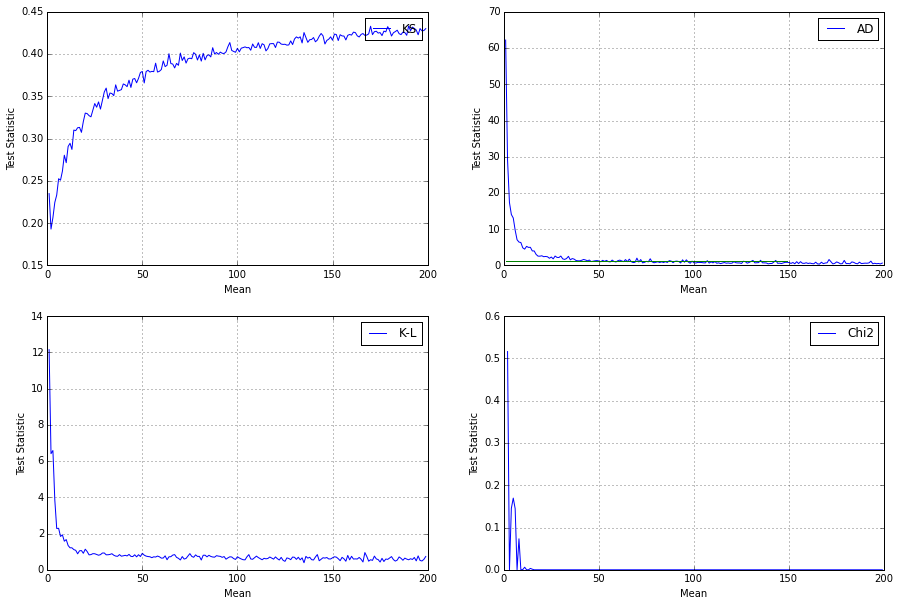

In [15]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray1, ks_p, label='KS')
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

fig.add_subplot(222)
pl.plot(narray1, ad_p,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

fig.add_subplot(223)
pl.plot(narray1, kl_p, label='K-L ')
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

fig.add_subplot(224)
pl.plot(narray1, chi2_p, label="Chi2")
plt.xlabel('Mean')
plt.ylabel('Test Statistic')
plt.grid(color = 'k')
pl.legend()

*Fig 2.* The four charts above, clockwise from top left, display the results of the KS, A-D, Chi2 and K-L tests run on a poisson vs normal distribution. They demonstrate that as sample mean increases, the test statistic generally decreases, suggesting a clustering closer to the mean. The exception is the KS test, which shows a sharp increase in difference between normal and poisson as the mean is increased.

##TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

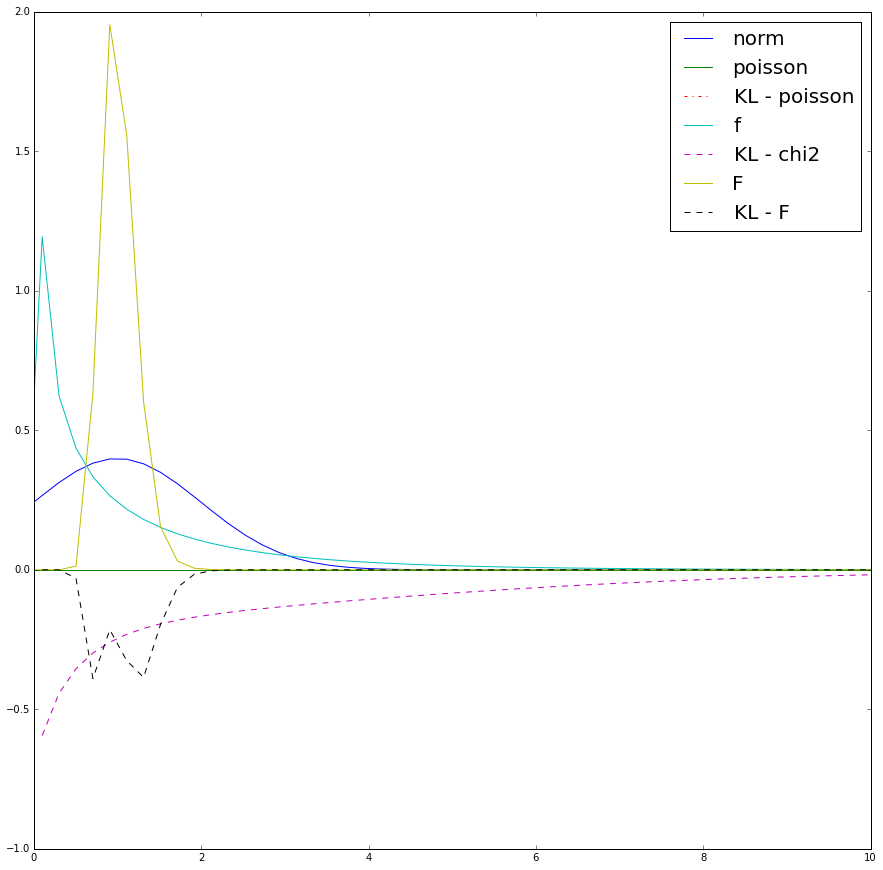

In [3]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend(fontsize = 20)

##WRITE A CAPTION HERE IN THIS CELL..
For all outputs, entropy is larger when sample size is smaller, and decreases in all cases with increasing sample size. This defines central limit theorem. It also demonstrates that more approximation is necessary when sample size is small than when it is large.